In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam

In [3]:
data_root = "../datasets/digit-recognizer/"
train = pd.read_csv(data_root+'train.csv')
test = pd.read_csv(data_root+'test.csv')

In [4]:
# works on tensors
# train, val = tf.split(tf.random.shuffle(train), [train_num, val_num], 0)

In [5]:
y_train = train['label']
x_train = train.drop(['label'], axis=1)
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
x_train.isnull().any(axis=1).describe()

count     42000
unique        1
top       False
freq      42000
dtype: object

In [7]:
test.isnull().any(axis=1).describe()

count     28000
unique        1
top       False
freq      28000
dtype: object

In [8]:
x_train = x_train/255.0
test = test/255.0

In [9]:
x_train['pixel345']

0        0.000000
1        0.094118
2        0.000000
3        0.082353
4        0.764706
           ...   
41995    0.537255
41996    0.000000
41997    0.000000
41998    0.858824
41999    0.850980
Name: pixel345, Length: 42000, dtype: float64

In [10]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [11]:
y_train = to_categorical(y_train, num_classes=10)

In [12]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

In [14]:
print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(4200, 28, 28, 1)
(4200, 10)
(37800, 28, 28, 1)
(37800, 10)


In [15]:
y_val[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

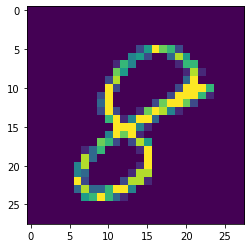

In [16]:
g = plt.imshow(x_train[0][:,:,0])

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
optimizer = Adam()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochs = 30
batch_size = 64

In [20]:
history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
            epochs=epochs, validation_data=(x_val, y_val), 
                    steps_per_epoch=x_train.shape[0]//batch_size, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37736/37800 [============================>.] - ETA: 0s - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00

In [21]:
model.evaluate(x=x_val, y=y_val)

4200/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.03073606572316505, 0.992381]

In [22]:
history.history

{'loss': [0.24523406404867706,
  0.08005440526163904,
  0.05967806560615817,
  0.050205228624769456,
  0.04244812826554135,
  0.03570668092732473,
  0.03387894588301974,
  0.03082087424072167,
  0.027725124406624953,
  0.024801676105829062,
  0.023875764052394756,
  0.021303559874321847,
  0.019278689274433065,
  0.01990799644439676,
  0.020160394085070216,
  0.017913508917688663,
  0.017941967862574872,
  0.015962988451828565,
  0.016971141121117545,
  0.014701858156182423,
  0.016270780324426783,
  0.015717150277964023,
  0.013358522513800607,
  0.014253693034079865,
  0.01261553691836256,
  0.012907261473407209,
  0.011006502672522563,
  0.014165940156850042,
  0.01238036301618822,
  0.01207040785191912],
 'accuracy': [0.92251056,
  0.9764946,
  0.9816621,
  0.98521304,
  0.98757154,
  0.9887375,
  0.98955905,
  0.99117553,
  0.99091053,
  0.99191755,
  0.992527,
  0.9934015,
  0.9936665,
  0.9935075,
  0.9935075,
  0.99406403,
  0.994435,
  0.995018,
  0.99459404,
  0.99530953,
  0

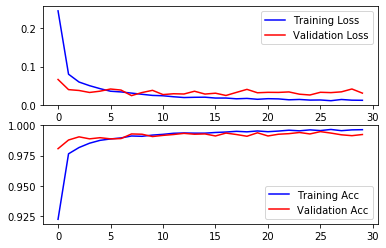

In [23]:
# loss and accuracy plots
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss', axes=ax[0])
legend = ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='Training Acc')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation Acc', axes=ax[1])
legend = ax[1].legend(loc='best')

In [24]:
# confusion matrix

In [25]:
# analyse model errors